In [2]:
from urllib import request

data = request.urlopen("https://maps.wikimedia.org/osm-intl/6/35/22.png").read()

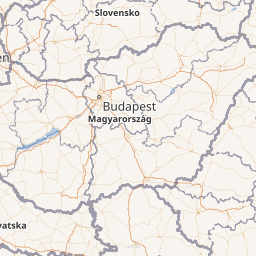

In [4]:
from PIL import Image
from io import BytesIO
img = Image.open(BytesIO(data))
img

In [5]:
import time
zoom = 6
imgs = []
for x in range(34, 37):
    for y in range(21, 24):
        imgs.append(request.urlopen("https://maps.wikimedia.org/osm-intl/{}/{}/{}.png".format(zoom, x, y)).read())
        time.sleep(1)

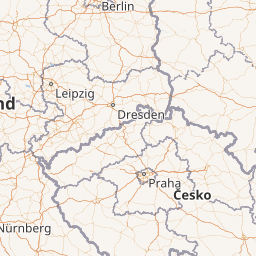

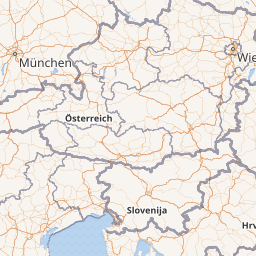

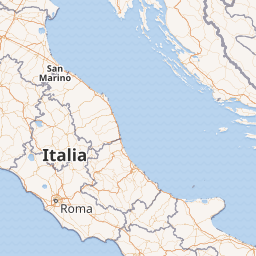

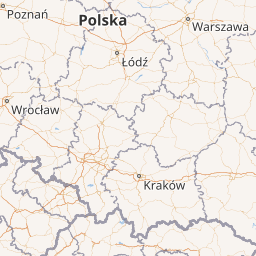

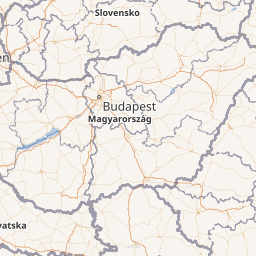

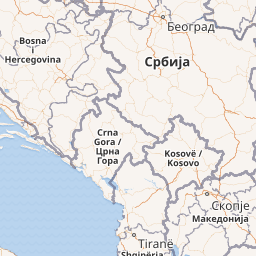

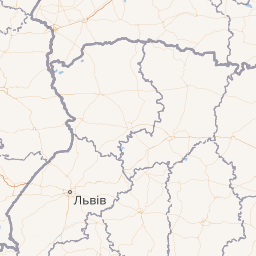

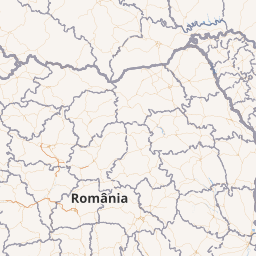

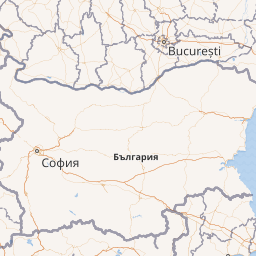

In [6]:
from IPython.display import display
for data in imgs:
    img = Image.open(BytesIO(data))
    display(img)

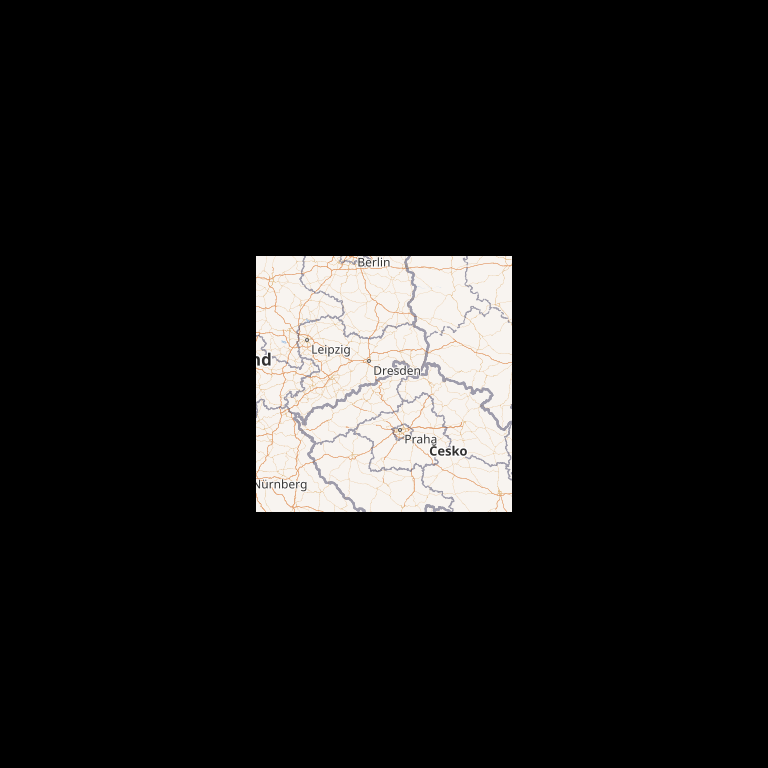

In [12]:
mapImg = Image.new("RGB", (3*256, 3*256))
mapImg.paste(Image.open(BytesIO(imgs[0])), (256,256))
mapImg

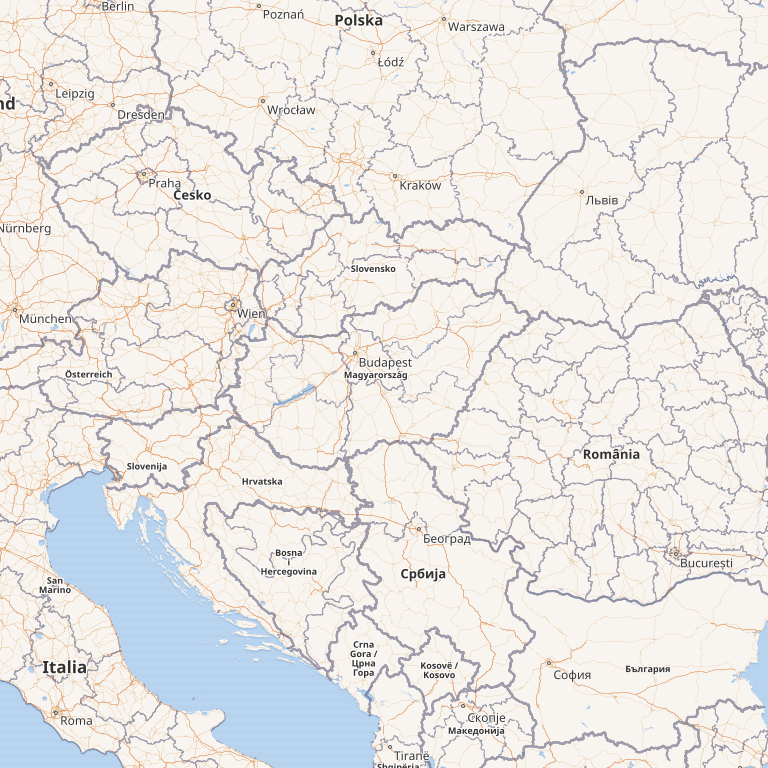

In [15]:
mapImg = Image.new("RGB", (3*256, 3*256))
for col in range(3):
    for row in range(3):
        img = imgs[3*col + row]
        mapImg.paste(Image.open(BytesIO(img)), (col*256, row*256))
mapImg.save("hungary.png")
mapImg

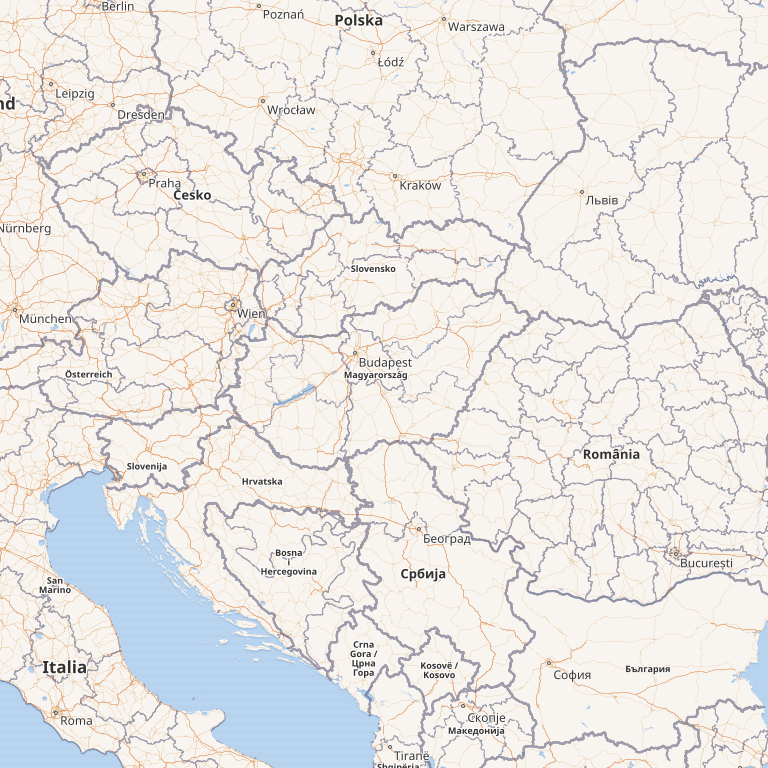

In [16]:
hungary = Image.open("hungary.png")
hungary

In [2]:
import re
ips = []
patt = re.compile(r"\d+\.\d+\.\d+\.\d+")
with open("log09.txt") as infile:
    for line in infile:
        parts = line.split()
        if len(parts) > 2 and patt.fullmatch(parts[2]):
            ips.append(parts[2])
ips

['106.75.74.6',
 '138.68.20.158',
 '218.150.220.230',
 '168.126.85.225',
 '46.101.27.6',
 '189.10.195.130',
 '182.61.42.234',
 '200.69.250.253',
 '142.4.203.130',
 '92.63.194.26',
 '202.29.51.126',
 '210.183.236.30',
 '196.203.31.154',
 '192.169.156.194',
 '139.59.78.236',
 '171.244.49.17',
 '140.207.46.136',
 '140.207.46.136',
 '165.227.97.108',
 '206.189.137.113',
 '129.213.96.241',
 '118.89.35.168',
 '54.37.205.162',
 '138.197.72.48',
 '172.81.243.232',
 '36.66.149.211',
 '81.169.166.72',
 '123.30.154.184',
 '5.196.110.170',
 '118.24.5.135',
 '49.235.202.57',
 '192.3.209.173',
 '121.190.213.206',
 '62.99.132.165',
 '176.31.170.245',
 '92.222.90.130',
 '210.105.192.76',
 '151.80.144.39',
 '51.83.77.224',
 '104.236.214.8',
 '128.199.185.42',
 '91.134.135.220',
 '197.243.34.154',
 '64.202.187.48',
 '51.83.76.36',
 '207.154.232.160',
 '193.188.22.188',
 '220.167.100.60',
 '180.250.248.170',
 '45.80.64.246',
 '83.212.100.156',
 '220.167.100.60',
 '110.10.174.179',
 '213.6.8.38',
 '182.61

In [3]:
import json
pars = [{"query" : '104.236.214.8'}, {"query" : '116.110.51.6'}]
data = json.dumps(pars)
data = data.encode('ascii')
with request.urlopen("http://ip-api.com/batch", data) as req:
    res = req.read()
res

NameError: name 'request' is not defined

In [25]:
resJson = json.loads(res)
resJson

[{'status': 'success',
  'country': 'United States',
  'countryCode': 'US',
  'region': 'NJ',
  'regionName': 'New Jersey',
  'city': 'Clifton',
  'zip': '07014',
  'lat': 40.8302,
  'lon': -74.1299,
  'timezone': 'America/New_York',
  'isp': 'DigitalOcean, LLC',
  'org': 'Digital Ocean, Inc.',
  'as': 'AS14061 DigitalOcean, LLC',
  'query': '104.236.214.8'}]

In [27]:
ips = set(ips)
len(ips)

1872

In [30]:
import time
ips = list(ips)
resList = []
for i in range(0, len(ips), 100):
    print("i:", i)
    pars = [{"query" : ip, "fields" : "lat,lon"} for ip in ips[i:i+100]]
    data = json.dumps(pars)
    data = data.encode('ascii')
    with request.urlopen("http://ip-api.com/batch", data) as req:
        resList.append(req.read())
    time.sleep(5)
resList

i: 0
i: 100
i: 200
i: 300
i: 400
i: 500
i: 600
i: 700
i: 800
i: 900
i: 1000
i: 1100
i: 1200
i: 1300
i: 1400
i: 1500
i: 1600
i: 1700
i: 1800


[b'[{"lat":21.0333,"lon":105.85},{"lat":36.066,"lon":120.3694},{"lat":39.9288,"lon":116.3889},{"lat":39.9042,"lon":116.407},{"lat":12.8498,"lon":77.6545},{"lat":47.6062,"lon":-122.332},{"lat":22.2874,"lon":114.148},{"lat":-20.3495,"lon":-40.3999},{"lat":-21.1306,"lon":-42.3664},{"lat":37.5541,"lon":126.957},{"lat":45.4053,"lon":-71.2486},{"lat":40.8054,"lon":-74.0241},{"lat":49.2144,"lon":-0.349421},{"lat":42.457,"lon":-2.45723},{"lat":51.4941,"lon":3.62086},{"lat":52.2835,"lon":10.5822},{"lat":-33.1561,"lon":-68.8288},{"lat":37.4388,"lon":127.1396},{"lat":53.845,"lon":22.985},{"lat":28.4506,"lon":119.935},{"lat":10.4089,"lon":-66.8804},{"lat":46.3333,"lon":21.7},{"lat":39.0438,"lon":-77.4874},{"lat":33.1402,"lon":119.789},{"lat":47.6101,"lon":-122.337},{"lat":50.1109,"lon":8.68213},{"lat":22.5626,"lon":88.363},{"lat":48.8713,"lon":2.32142},{"lat":-32.9541,"lon":-60.6636},{"lat":-6.18054,"lon":106.828},{"lat":21.0333,"lon":105.85},{"lat":64.2047,"lon":27.7631},{"lat":48.8714,"lon":2.32

In [34]:
jsonResList = [json.loads(r) for r in resList]
with open("iplocs.json", "w") as outfile:
    json.dump(jsonResList, outfile)

In [35]:
zoom = 3
imgs = []
for x in range(0, 8):
    for y in range(0, 8):
        imgs.append(request.urlopen("https://maps.wikimedia.org/osm-intl/{}/{}/{}.png".format(zoom, x, y)).read())
        time.sleep(0.5)

In [1]:
mapImg = Image.new("RGB", (8*256, 8*256))
for col in range(8):
    for row in range(8):
        img = imgs[8*col + row]
        mapImg.paste(Image.open(BytesIO(img)), (col*256, row*256))
mapImg.save("worldmap.png")
mapImg

NameError: name 'Image' is not defined

In [47]:
ipList = []
for r in jsonResList:
    for d in r:
        ipList.append(d)
ipList[0]["lat"]

21.0333

In [44]:
import math
def deg2num(lat_deg, lon_deg, zoom):
  lat_rad = math.radians(lat_deg)
  n = 2.0 ** zoom
  xtile = (lon_deg + 180.0) / 360.0 * n
  ytile = (1.0 - math.asinh(math.tan(lat_rad)) / math.pi) / 2.0 * n
  return (xtile, ytile)

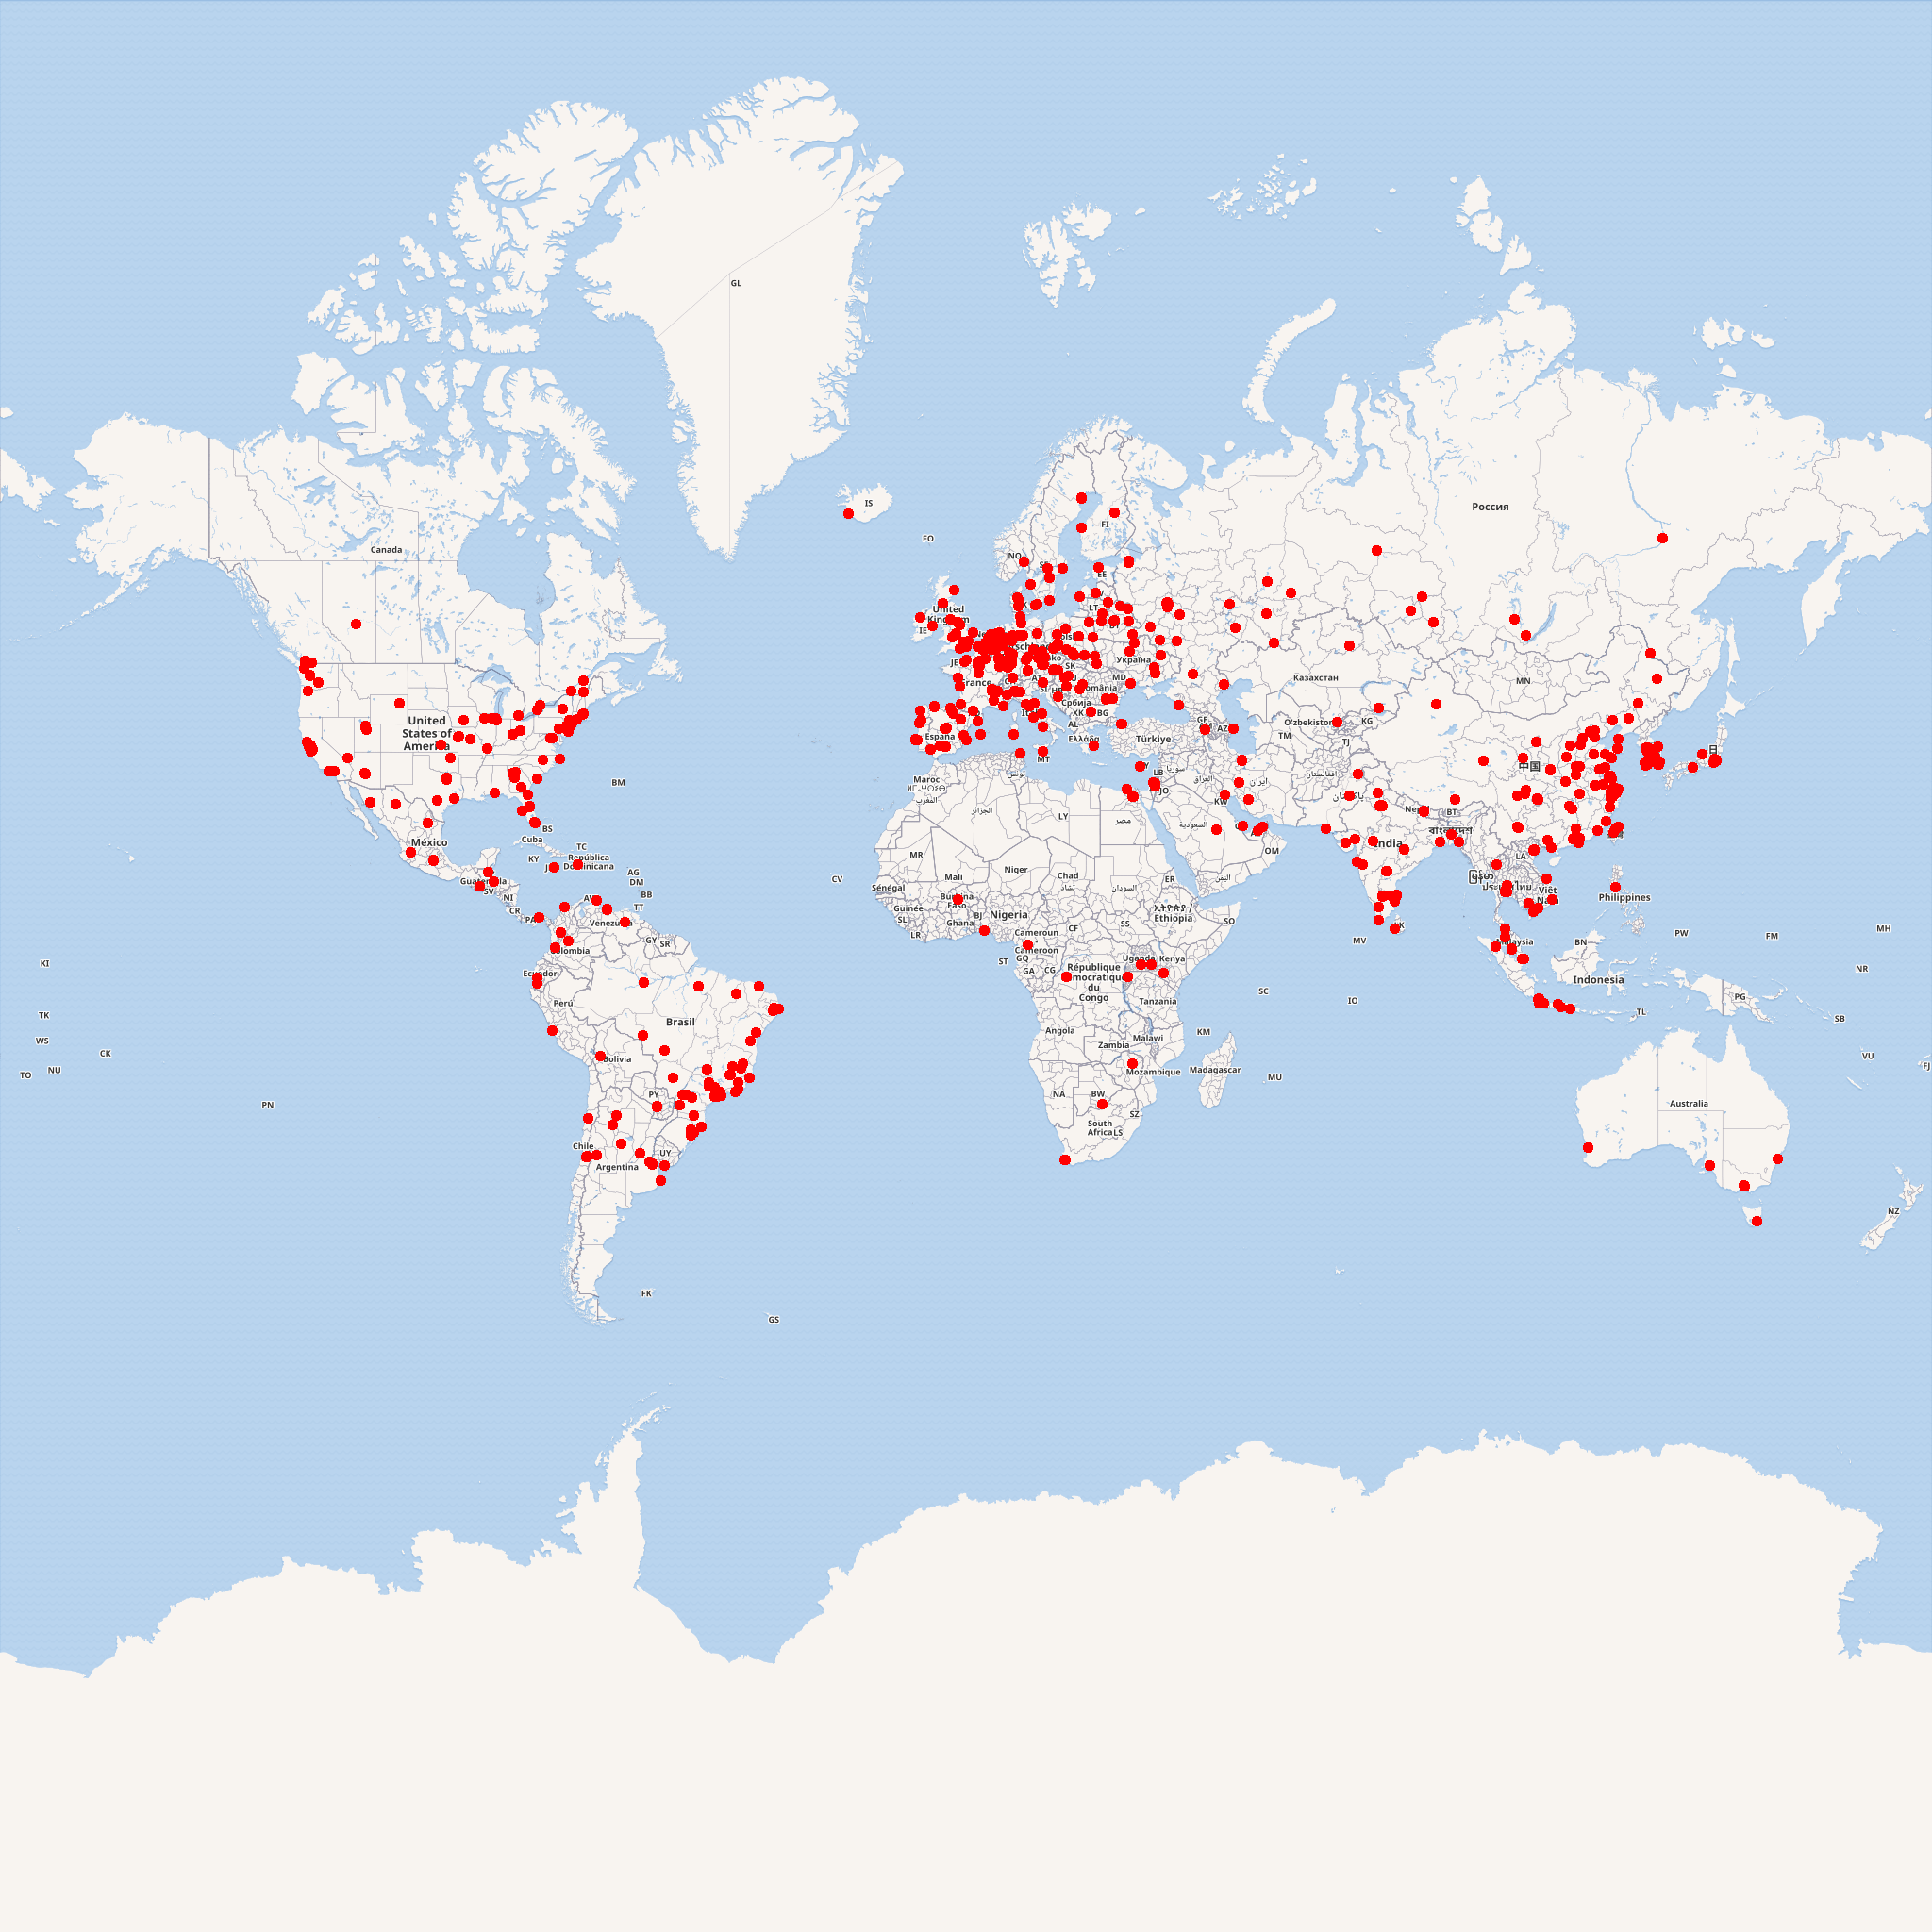

In [49]:
from PIL import ImageDraw
tmp = mapImg.copy()
draw = ImageDraw.Draw(tmp)
for ip in ipList:
    try:
        lat, lon = ip["lat"], ip["lon"]
        locX, locY = deg2num(lat, lon, 3)
        x = int(locX*256)
        y = int(locY*256)
        draw.ellipse((x-5, y-5, x+5, y+5), fill='red')
    except:
        pass
tmp.save("hacks.png")
tmp

In [52]:
import pandas as pd
veh = pd.read_csv("vehdata.csv", sep=";", encoding="latin")

/home/heikki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,18,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
veh.head(100)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,vaihteidenLkm,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,Co2,matkamittarilukema,valmistenumero2,jarnro
0,MUU,NaN,21.0,1,NaN,NaN,19670000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,91.0,NaN,NaN,NaN,1
1,MUU,1976-09-01,13.0,1,NaN,NaN,19760000,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,893.0,NaN,NaN,NaN,2
2,M1,1984-07-09,NaN,1,NaN,NaN,19840000,1,NaN,NaN,...,NaN,FIESTA,5.0,NaN,1,564.0,NaN,NaN,NaN,3
3,MUU,1983-09-22,13.0,1,NaN,NaN,19830000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,734.0,NaN,NaN,NaN,4
4,O1,1994-02-09,1.0,1,NaN,NaN,19940209,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,761.0,NaN,NaN,NaN,5
